# UNSUPERVIZED LEARNING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/teahupoo20/Documents/GitHub/data-ft-par-labs/Labs/data/BreadBasket_DMS.csv')

In [3]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


## goal : cluster different customers (personas)

In [4]:
df['datetime']=pd.to_datetime(df.Date+' '+df.Time)

In [5]:
df.datetime

0       2016-10-30 09:58:11
1       2016-10-30 10:05:34
2       2016-10-30 10:05:34
3       2016-10-30 10:07:57
4       2016-10-30 10:07:57
                ...        
21288   2017-04-09 14:32:58
21289   2017-04-09 14:32:58
21290   2017-04-09 14:57:06
21291   2017-04-09 14:57:06
21292   2017-04-09 15:04:24
Name: datetime, Length: 21293, dtype: datetime64[ns]

In [10]:
df.Item.nunique()

95

In [11]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [12]:
#what to do about these objects? 
#to numbers but before, with our domain knowledge, we categorize them first (but this is not mandatory)
#this is just to make it easy to read after the clustering 

In [13]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [14]:
df['beverage']=np.where(df.Item.isin(beverage),1,0)
df['other']=np.where(df.Item.isin(other),1,0)
df['kids']=np.where(df.Item.isin(kids),1,0)
df['snacks']=np.where(df.Item.isin(snacks),1,0)
df['bread']=np.where(df.Item.isin(bread),1,0)
df['breakfast_pastry']=np.where(df.Item.isin(breakfast_pastry),1,0)
df['breakfast']=np.where(df.Item.isin(breakfast),1,0)
df['dessert']=np.where(df.Item.isin(dessert),1,0)
df['condiments']=np.where(df.Item.isin(condiments),1,0)
df['lunch']=np.where(df.Item.isin(lunch),1,0)
df['other_food']=np.where(df.Item.isin(other_food),1,0)

In [15]:
#the trade off is the precision and the number of personas. Like instead of having 96 categories , we will have only 11.
#

In [16]:
df

,Date,Time,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,2017-04-09 14:32:58,1,0,0,0,0,0,0,0,0,0,0
21289,2017-04-09,14:32:58,9682,Tea,2017-04-09 14:32:58,1,0,0,0,0,0,0,0,0,0,0
21290,2017-04-09,14:57:06,9683,Coffee,2017-04-09 14:57:06,1,0,0,0,0,0,0,0,0,0,0
21291,2017-04-09,14:57:06,9683,Pastry,2017-04-09 14:57:06,0,0,0,0,0,1,0,0,0,0,0


In [21]:
df_group=df.groupby(['Transaction','datetime']).sum().reset_index(level='datetime').copy()

In [25]:
df_group['day_name']=df_group.datetime.dt.day_name()
df_group['hour']=df_group.datetime.dt.hour

In [26]:
df_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,day_name,hour
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,Sunday,9
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,Sunday,10
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0,Sunday,10
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,Sunday,10
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0,Sunday,10


In [27]:
df_group.day_name.value_counts()
#majority of ppl come on Sat

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day_name, dtype: int64

In [28]:
df_group.hour.value_counts()
#majority of ppl come around 9-3PM

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
18      52
19      34
7       16
20      15
22       7
23       3
21       2
1        1
Name: hour, dtype: int64

<AxesSubplot:>

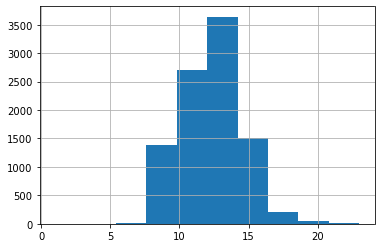

In [29]:
df_group.hour.hist()

In [30]:
df_group.drop('datetime', axis=1, inplace=True)
#drop the datetime because we dont need it anymore

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
encoder = OneHotEncoder()
encoder.fit_transform(df_group[['day_name']])

<9531x7 sparse matrix of type '<class 'numpy.float64'>'
	with 9531 stored elements in Compressed Sparse Row format>

In [33]:
df_ml=pd.get_dummies(data=df_group, columns=['day_name'], drop_first=True).copy()

In [34]:
df_ml

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
Transaction,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,1,0,0,0,0,0,0,14,0,0,1,0,0,0
9681,1,1,0,0,0,0,0,1,0,0,1,14,0,0,1,0,0,0
9682,2,0,0,0,0,1,0,0,0,0,1,14,0,0,1,0,0,0


## PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca=PCA(0.85)
pca.fit(df_ml)
df_pca=pca.transform(df_ml)

In [37]:
df_pca=pd.DataFrame(df_pca, columns=['PC'+str(i) for i in range (1, df_pca.shape[1]+1)])

In [40]:
df_pca

,PC1,PC2,PC3,PC4,PC5
0,3.198122,-0.927710,0.243533,0.006125,-0.180226
1,2.228594,-1.275378,1.181638,-0.161534,-0.078216
2,2.108349,0.423910,-0.218946,0.881109,-0.155497
3,2.199661,-0.581693,-0.785464,-0.027864,0.691540
4,2.207516,0.036358,0.441028,-0.333733,0.733569
...,...,...,...,...,...
9526,-1.790586,-1.099092,0.295625,-0.214565,-0.033516
9527,-1.888102,0.333721,-0.255261,0.648580,-0.154135
9528,-1.835226,1.158444,-0.210979,-0.567940,0.679837
9529,-1.811665,0.212644,-0.444985,-0.386764,0.778269


## Clustering

In [39]:
from sklearn.cluster import KMeans

In [41]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 2.6 MB/s eta 0:00:01


In [42]:
#SOME MATRICS : KElbow
from yellowbrick.cluster import KElbowVisualizer

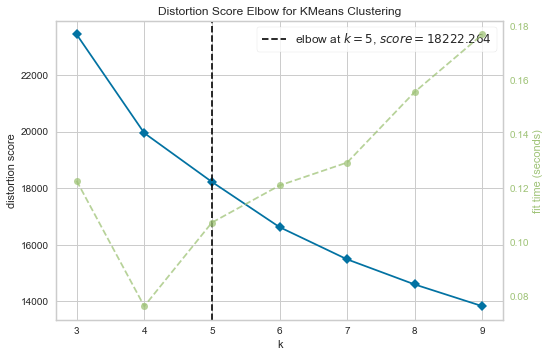

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(3,10))

visualizer.fit(df_pca)
visualizer.poof()

In [ ]:
#5 is a good number for personas
#if we put different numbers on the k, we will get different results 
#but usually 5 is a good number

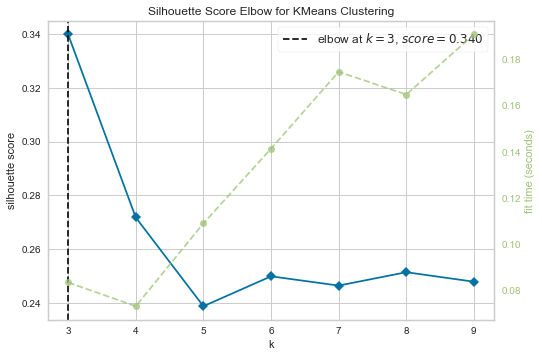

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(3,10), metric='silhouette')

visualizer.fit(df_pca)
visualizer.poof()

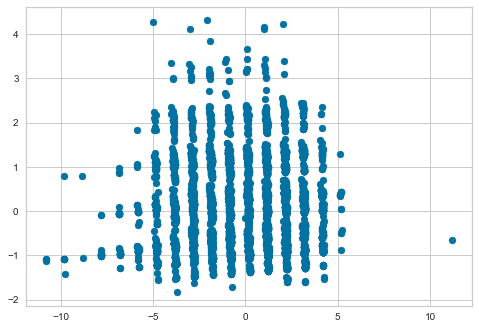

In [46]:
plt.scatter(df_pca['PC1'], df_pca['PC2'])

In [47]:
model= KMeans(5)
model.fit(df_pca)
model.predict(df_pca)

array([1, 1, 3, ..., 4, 4, 4], dtype=int32)

In [48]:
model.cluster_centers_

array([[-3.07380909e-01, -2.76133309e-02, -3.68431518e-02,
        -1.48437889e-02, -9.60817730e-02],
       [ 3.21091318e+00, -2.42706049e-01,  6.33539064e-02,
        -9.83198144e-03,  2.72092256e-02],
       [-4.42375862e+00, -8.63691484e-02,  1.99383286e-02,
        -1.07799160e-02,  1.01764547e-01],
       [ 1.54450665e+00,  2.08134998e-01, -3.16471566e-02,
         1.42817616e-02,  4.22832353e-02],
       [-2.29581806e+00,  3.82292712e-02,  1.88523881e-02,
         1.46223095e-02,  3.13813022e-03]])

In [49]:
df_ml['cluster']=model.labels_
#labels = predict

In [50]:
df_ml.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,cluster
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0,1
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0,3
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0,3
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0,3


In [51]:
df_ml.cluster.value_counts()
#pretty homogeneous

0    2509
3    2360
4    2054
1    1752
2     856
Name: cluster, dtype: int64

In [52]:
#How these different clusters respond to different products

In [54]:
df_group

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,day_name,hour
Transaction,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,Sunday,9
2,0,0,0,0,2,0,0,0,0,0,0,Sunday,10
3,1,0,0,0,0,0,0,1,1,0,0,Sunday,10
4,0,0,0,0,0,1,0,0,0,0,0,Sunday,10
5,1,0,0,0,1,1,0,0,0,0,0,Sunday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,1,0,0,0,0,0,0,Sunday,14
9681,1,1,0,0,0,0,0,1,0,0,1,Sunday,14
9682,2,0,0,0,0,1,0,0,0,0,1,Sunday,14


In [55]:
df_group['cluster']=model.labels_

In [56]:
df_group

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,day_name,hour,cluster
Transaction,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,Sunday,9,1
2,0,0,0,0,2,0,0,0,0,0,0,Sunday,10,1
3,1,0,0,0,0,0,0,1,1,0,0,Sunday,10,3
4,0,0,0,0,0,1,0,0,0,0,0,Sunday,10,3
5,1,0,0,0,1,1,0,0,0,0,0,Sunday,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,1,0,0,0,0,0,0,Sunday,14,4
9681,1,1,0,0,0,0,0,1,0,0,1,Sunday,14,4
9682,2,0,0,0,0,1,0,0,0,0,1,Sunday,14,4


In [57]:
pd.crosstab(df_group.day_name, df_group.cluster)

cluster,0,1,2,3,4
day_name,,,,,
Friday,387,322,134,346,299
Monday,313,197,91,279,255
Saturday,489,421,234,506,418
Sunday,388,142,47,389,298
Thursday,320,237,117,298,280
Tuesday,343,220,115,276,249
Wednesday,269,213,118,266,255


In [59]:
pd.crosstab(df_group.day_name, df_group.cluster, normalize='columns').round(2)

cluster,0,1,2,3,4
day_name,,,,,
Friday,0.15,0.18,0.16,0.15,0.15
Monday,0.12,0.11,0.11,0.12,0.12
Saturday,0.19,0.24,0.27,0.21,0.20
Sunday,0.15,0.08,0.05,0.16,0.15
Thursday,0.13,0.14,0.14,0.13,0.14
Tuesday,0.14,0.13,0.13,0.12,0.12
Wednesday,0.11,0.12,0.14,0.11,0.12


In [60]:
pd.crosstab(df_group.hour, df_group.cluster, normalize='columns').round(2)
#not readable

cluster,0,1,2,3,4
hour,,,,,
1,0.00,0.00,0.00,0.00,0.00
7,0.00,0.01,0.00,0.00,0.00
8,0.00,0.21,0.00,0.00,0.00
9,0.00,0.57,0.00,0.00,0.00
10,0.00,0.20,0.00,0.39,0.00
11,0.00,0.00,0.00,0.61,0.00
12,0.54,0.00,0.00,0.00,0.00
13,0.46,0.00,0.00,0.00,0.00
14,0.00,0.00,0.00,0.00,0.55


In [61]:
import seaborn as sns

<AxesSubplot:xlabel='cluster', ylabel='hour'>

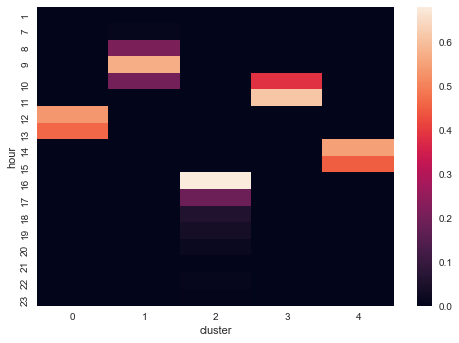

In [62]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

<AxesSubplot:xlabel='cluster', ylabel='day_name'>

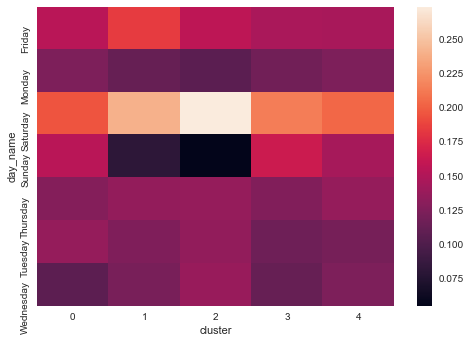

In [64]:
sns.heatmap(pd.crosstab(df_group.day_name, df_group.cluster, normalize='columns'))

<AxesSubplot:xlabel='cluster', ylabel='hour'>

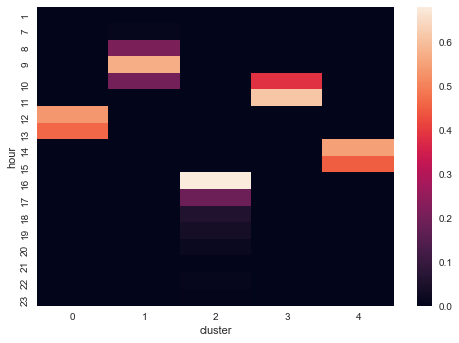

In [65]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))
#this is neat because time is the only continous variable

In [66]:
#Cluster first and use another data to classify the cluster (like age)

In [67]:
df.iloc[:,:4]

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [69]:
df_merged=pd.merge(df.iloc[:,:4], df_group.reset_index()[['Transaction', 'cluster']],on='Transaction', how='outer' )

In [70]:
df_merged.head()

,Date,Time,Transaction,Item,cluster
0,2016-10-30,09:58:11,1,Bread,1
1,2016-10-30,10:05:34,2,Scandinavian,1
2,2016-10-30,10:05:34,2,Scandinavian,1
3,2016-10-30,10:07:57,3,Hot chocolate,3
4,2016-10-30,10:07:57,3,Jam,3


In [71]:
#what is the most common product of each cluster

In [72]:
df_merged.groupby('cluster').Item.value_counts()

cluster  Item                         
0        Coffee                           1344
         Bread                             814
         Sandwich                          396
         Tea                               363
         NONE                              326
                                          ... 
4        Polenta                             1
         Raspberry shortbread sandwich       1
         Raw bars                            1
         Spread                              1
         Vegan Feast                         1
Name: Item, Length: 353, dtype: int64

In [76]:
#top 5 rounded and to integer
(df_merged.groupby('cluster').Item.apply(lambda x: x.value_counts(normalize=True).nlargest(5)).round(2)*100).astype(int)

cluster               
0        Coffee           23
         Bread            14
         Sandwich          7
         Tea               6
         NONE              6
1        Bread            28
         Coffee           24
         Pastry            9
         Medialuna         6
         Tea               4
2        Coffee           22
         Bread            13
         Tea               9
         Cake              8
         Hot chocolate     5
3        Coffee           33
         Bread            13
         Tea               6
         Pastry            6
         Cake              4
4        Coffee           24
         Bread            13
         Tea               9
         Cake              7
         Sandwich          5
Name: Item, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='hour'>

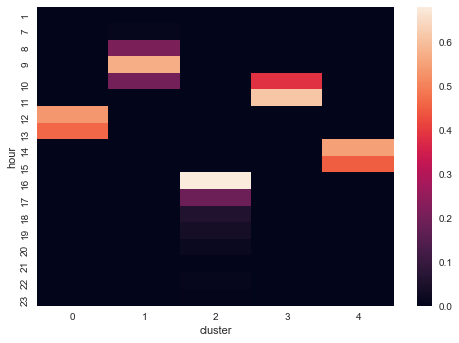

In [74]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

In [77]:
#The most important part in Unspervised learning is the explaining part of the clusters we find 
#other wise its not useful
#unlike regression / classification we dont have a metric such as feature importance

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

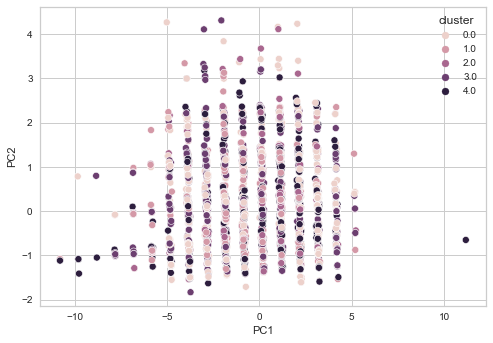

In [78]:
sns.scatterplot(x=df_pca.PC1, y=df_pca.PC2, hue=df_ml.cluster)
#no pattern visible here

<AxesSubplot:xlabel='PC4', ylabel='PC5'>

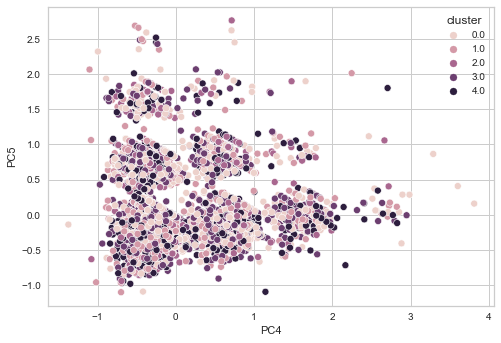

In [87]:
sns.scatterplot(x=df_pca.PC4, y=df_pca.PC5, hue=df_ml.cluster)
#no pattern visible here either

## Clusters ## without PCA

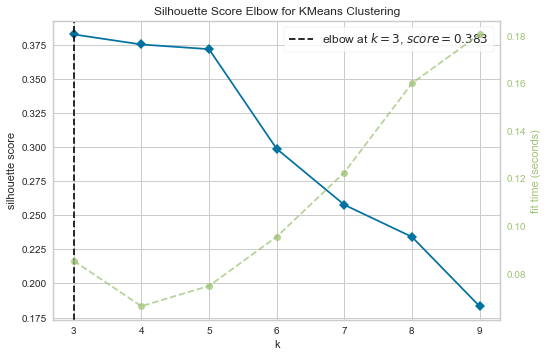

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [95]:
mod=KMeans()
visualizer=KElbowVisualizer(mod, k=(3,10), metric ='silhouette')
visualizer.fit(df_ml)
visualizer.poof()

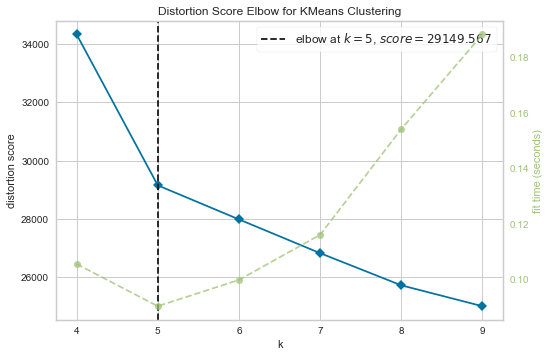

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
mod=KMeans()
visualizer=KElbowVisualizer(mod, k=(4,10))
visualizer.fit(df_ml)
visualizer.poof()

In [88]:
model= KMeans(5)
model.fit(df_ml)
model.predict(df_ml)

array([0, 0, 3, ..., 1, 1, 1], dtype=int32)

<AxesSubplot:xlabel='col_0', ylabel='hour'>

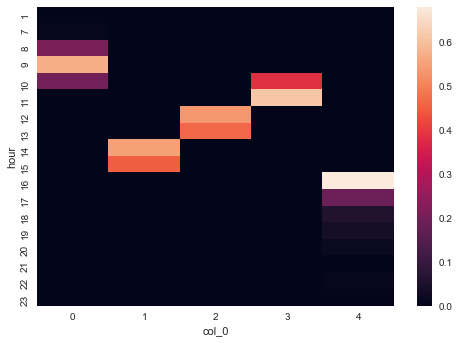

In [90]:
sns.heatmap(pd.crosstab(df_group.hour, model.labels_, normalize='columns'))

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

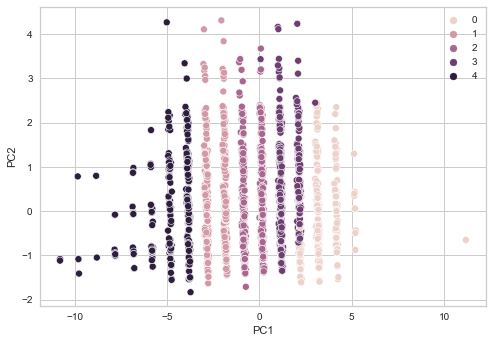

In [91]:
sns.scatterplot(x=df_pca.PC1, y=df_pca.PC2, hue=model.labels_)
#this is without PCA but using pca ( to have less column)

# Evaluation metrics 

In [96]:
#so far we can have results but inconclusives

In [97]:
from sklearn import datasets

In [98]:
from sklearn.cluster import AgglomerativeClustering

In [99]:
X, y = datasets.make_blobs(random_state=42)

In [100]:
X.shape

(100, 2)

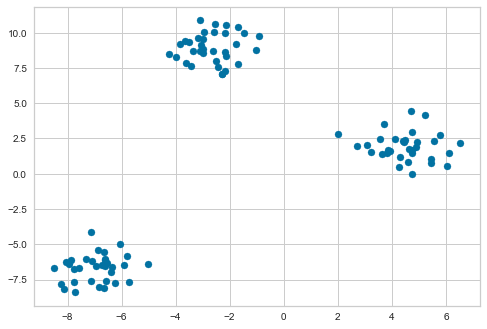

In [102]:
plt.scatter(X[:,0], X[:,1])

In [103]:
km=KMeans(3)
ac=AgglomerativeClustering(3)

In [104]:
km.fit(X)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [105]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [106]:
print('Silhouette Score for KMeans is', silhouette_score(X,km.labels_))
print('Silhouette Score for Agglomerative is', silhouette_score(X,ac.labels_))
#this is pretty good

Silhouette Score for KMeans is 0.8469881221532085
Silhouette Score for Agglomerative is 0.8469881221532085


In [107]:
print('davies_bouldin Score for KMeans is', davies_bouldin_score(X,km.labels_))
print('davies_bouldin Score for Agglomerative is', davies_bouldin_score(X,ac.labels_))
#this is also good

davies_bouldin Score for KMeans is 0.21374667882527573
davies_bouldin Score for Agglomerative is 0.21374667882527573


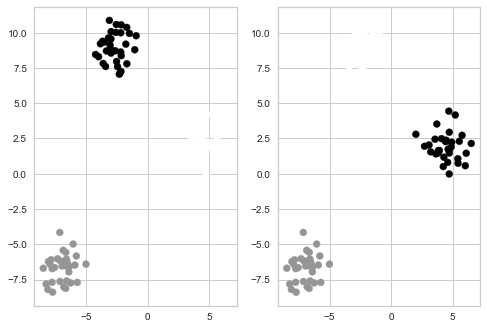

In [109]:
_, [ax1, ax2]= plt.subplots(1,2)

ax1.scatter(X[:,0], X[:,1], c=km.labels_)

ax2.scatter(X[:,0], X[:,1], c=ac.labels_)

In [110]:
#same result

In [131]:
X, y = datasets.make_moons(random_state=42, noise =0.1)

In [132]:
X.shape

(100, 2)

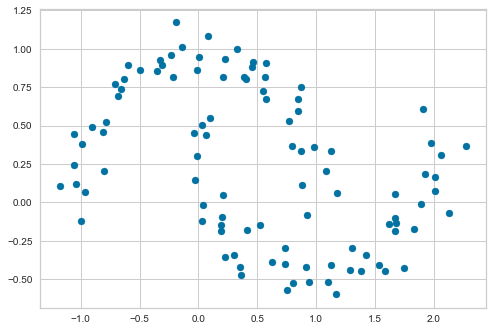

In [133]:
plt.scatter(X[:,0], X[:,1])

In [134]:
km=KMeans(2)
ac=AgglomerativeClustering(2, linkage='single')

In [135]:
km.fit(X)
ac.fit(X)

AgglomerativeClustering(linkage='single')

In [136]:
print('Silhouette Score for KMeans is', silhouette_score(X,km.labels_))
print('Silhouette Score for Agglomerative is', silhouette_score(X,ac.labels_))

Silhouette Score for KMeans is 0.47670426630964785
Silhouette Score for Agglomerative is 0.3075102992009325


In [137]:
print('davies_bouldin Score for KMeans is', davies_bouldin_score(X,km.labels_))
print('davies_bouldin Score for Agglomerative is', davies_bouldin_score(X,ac.labels_))

davies_bouldin Score for KMeans is 0.7835429631981142
davies_bouldin Score for Agglomerative is 1.1904671758172505


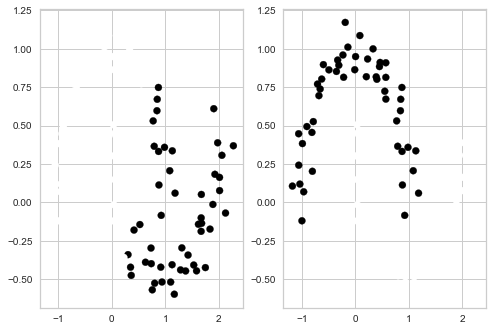

In [138]:
_, [ax1, ax2]= plt.subplots(1,2)

ax1.scatter(X[:,0], X[:,1], c=km.labels_)

ax2.scatter(X[:,0], X[:,1], c=ac.labels_)

In [ ]:
#Kmeans is better on the metrics but visually the Agglomerative is better
#You cannot rely solely on metrics, because visuals are better

## Text manipulations : keyword detection

In [139]:
categories=['comp.graphics','talk.politics.guns','sci.space','rec.sport.hockey']

In [140]:
from sklearn.datasets import fetch_20newsgroups

In [141]:
datasets=fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [142]:
datasets

{'data': ['From: v111qheg@ubvmsb.cc.buffalo.edu (P.VASILION)\nSubject: Re: WACO burning\nOrganization: University at Buffalo\nLines: 25\nNews-Software: VAX/VMS VNEWS 1.41\nNntp-Posting-Host: ubvmsb.cc.buffalo.edu\n\nIn article <C5v15A.7oo@dscomsa.desy.de>, hallam@zeus02.desy.de writes...\n[... snip ...]\n\n>|>>Has anyone in U.S. heard anything similar or are U.S. government\n>|>>spin-doctors censoring such information?\n>|>>\n>|>>The B.B.C. news is also reporting that about 20 of those that died\n>|>>were british citizens.\n> \n>The B.B.C. are also reporting that bodies of B-D members were found\n>with bullet wounds in a manner that suggests they may have been shot\n>attempting to leave the compound during the fire.\n> \n>There is a possibility that these are the bodies of people killed during\n>the initial shootout.\n> \n>Phill Hallam-Baker\n\nCan you imagine what happens when a magazine explodes? Bullets go flying every\nwhere. IMHO, these "gunshot wounds" were actually caused when t

In [147]:
print(datasets.data[0])

From: v111qheg@ubvmsb.cc.buffalo.edu (P.VASILION)
Subject: Re: WACO burning
Organization: University at Buffalo
Lines: 25
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsb.cc.buffalo.edu

In article <C5v15A.7oo@dscomsa.desy.de>, hallam@zeus02.desy.de writes...
[... snip ...]

>|>>Has anyone in U.S. heard anything similar or are U.S. government
>|>>spin-doctors censoring such information?
>|>>
>|>>The B.B.C. news is also reporting that about 20 of those that died
>|>>were british citizens.
> 
>The B.B.C. are also reporting that bodies of B-D members were found
>with bullet wounds in a manner that suggests they may have been shot
>attempting to leave the compound during the fire.
> 
>There is a possibility that these are the bodies of people killed during
>the initial shootout.
> 
>Phill Hallam-Baker

Can you imagine what happens when a magazine explodes? Bullets go flying every
where. IMHO, these "gunshot wounds" were actually caused when the magazines 
went up. A Texas ranger

In [150]:
datasets.target[10]

1

In [148]:
datasets.target_names

['comp.graphics', 'rec.sport.hockey', 'sci.space', 'talk.politics.guns']

In [165]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [166]:
vector = TfidfVectorizer(max_df=0.5, max_features = 1000, stop_words='english') #we dont care about 'a', 'the', etc 

In [167]:
X=vector.fit_transform(datasets.data)

In [168]:
X

<3869x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 178514 stored elements in Compressed Sparse Row format>

In [169]:
from sklearn.cluster import MiniBatchKMeans

mkm=MiniBatchKMeans(4)
mkm.fit(X)

MiniBatchKMeans(n_clusters=4)

In [172]:
silhouette_score(X, mkm_labels_)

NameError: name 'mkm_labels_' is not defined

In [158]:
davies_bouldin_score(X.toarray(),mkm.labels_)

NameError: name 'mkm' is not defined

In [159]:
terms = vector.get_feature_names()

In [161]:
for i in range(4):
    print(f'Cluster #{i}\n')
    for i in mkm.cluster_centers_.argsort()[:, ::-1][i, :10]:
        print(terms[ind]+' ')
    print()

Cluster #0



NameError: name 'mkm' is not defined

In [171]:
np.array

array([3, 3, 2, ..., 2, 0, 0])